# Introduction

## 0. This is a sequel!
- Welcome to **Advanced Medical Machine Learning**

- This course is a follow up of **Introduction in Medical Machine Learning** where we covered
  - Basics of Python
  - Basics of most important packages
    - Data: NumPy, Pandas
    - Visualization: Matplotlib, Seaborn
    - Machine Learning: sklearn, photonai, fastai
  - Basics of Machine Learning Concepts
- You can use the [Introduction Lecture](https://drive.google.com/drive/u/1/folders/1ckviz2NmkXxPVmg2onKlEIivdvCuZaA_) as a cheat sheet
- **Still no cue?** Use Stackoverflow (e.g. google "numpy to torch array site:stackoverflow.com")
- **Still no cue??** Use [ChatGPT](https://chat.openai.com/) to **ask for hints**!

- In this course we will focus on
  - Usage of functions and classes
  - Neuroimaging Data -> nibabel and matplotlib
  - Deep Learning / Neural Networks -> PyTorch and fastai
  - **Goal: Training a neural network with MRI scans**
    - Subgoal: Get used to the **struggle**
  - **Reward: Get to know [niftiview](https://github.com/codingfisch/niftiview) & [niftiai](https://github.com/codingfisch/niftiai)** (packages that reduce the struggle)

<p>
<img src="https://img-9gag-fun.9cache.com/photo/aKEXmLb_460s.jpg"/>
<figcaption>Taken from <a href="https://img-9gag-fun.9cache.com/photo/aKEXmLb_460s.jpg">https://img-9gag-fun.9cache.com/photo/aKEXmLb_460s.jpg</a></figcaption>
</p>

Don't panic, Deep Learning isn't rocket science because it has a
- Low genius-factor

and a
- High craftsmanship-factor

<p>
  <img src="https://www.looper.com/img/gallery/breaking-bad-bryan-cranston-only-needed-one-audition-to-get-walter-white/intro-1681586016.jpg"  width="500"/>
  <img src="https://i.ytimg.com/vi/-8T0RakfupU/sddefault.jpg" width="400"/>
  <figcaption>Taken from <a href="https://www.looper.com/1258770/breaking-bad-bryan-cranston-needed-one-audition-walter-white/">https://www.looper.com/1258770/breaking-bad-bryan-cranston-needed-one-audition-walter-white/</a> and <a href="https://i.ytimg.com/vi/-8T0RakfupU/sddefault.jpg">https://i.ytimg.com/vi/-8T0RakfupU/sddefault.jpg</a></figcaption>
</p>

## 1. Train your first neural net 🤖

Let's start with a complete script which trains a neural net to recognize handwritten digits:

```python
from fastai.vision.all import *

path = untar_data(URLs.MNIST_TINY)
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files,
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)
data = mnist.dataloaders(path)
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10), nn.LogSoftmax(dim=1))
learn = Learner(data, model, metrics=error_rate)
learn.fit(5)
learn.show_results()
```
We might don't fully grasp the script yet, but **wow, only 11 lines of code** 🤓

The following notebooks will guide you through the things you have to learn about
1. (Down-)Loading data
2. Model Training
3. Model Evaluation

But first, let's dig into the script a little!

**Task 1.1:** Identify the steps 1. (Down-)Loading data, 2. Model Training and 3. Model Evaluation in the script and Copy & Paste them in three successive code cells.


In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_TINY)
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_items=get_image_files,
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)
data = mnist.dataloaders(path)

In [ ]:
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10), nn.LogSoftmax(dim=1))
learn = Learner(data, model, metrics=error_rate)
learn.fit(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.551035,0.901280,0.058655,00:00
1,1.102382,0.447119,0.020029,00:00
2,0.829394,0.272168,0.017167,00:00
3,0.651924,0.194103,0.018598,00:00
4,0.529651,0.153592,0.015737,00:00


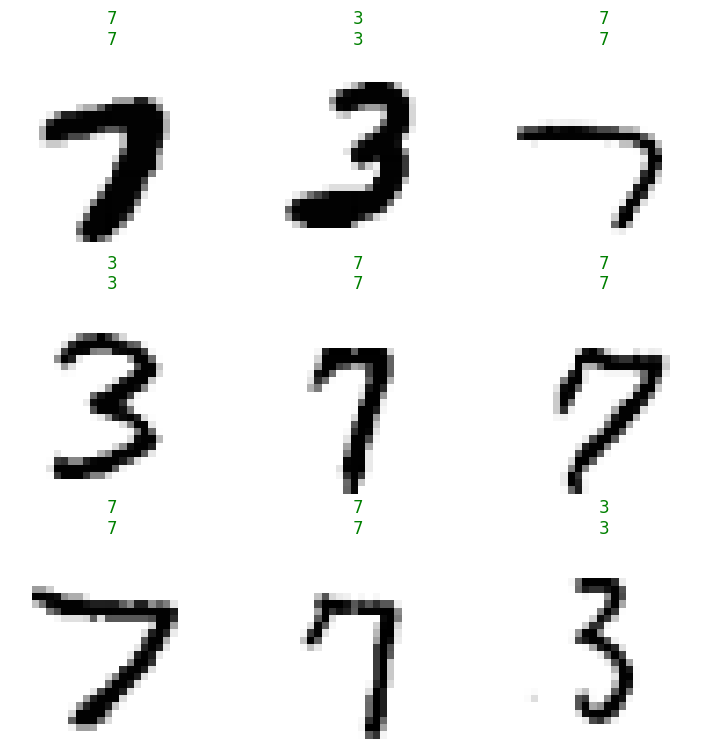

In [ ]:
learn.show_results()

**Task 1.2:** Point out instances of the following Python types in the script: integer, function, class.

Opposed to a definition (starting with e.g. `def` or `class`) of an object, an instance is an "occurence" of an object.

- Integers: Numbers in `nn.Linear(784, 10)`, `nn.LogSoftmax(dim=1)`, `fit(5)`

Good Python code follows the [Python Enhancement Proposals (PEP) 8](https://peps.python.org/pep-0008/) which declares to use `CapitalizedWords` for classes and `lower_case_with_underscores` for functions. Applied to the code snipped:

- Functions: `untar_data`, `get_image_files`, `parent_label`
- Classes: `DataBlock`, `ImageBlock`, `GrandparentSplitter`, ...

**Task 1.3 (Tricky):** Point out function- and class-definitions. Asked differently, where do the functions and classes come from?

All definitions: `from fastai.vision.all import *` (<- in that star)

fastai is atypical in using `*` which just imports EVERTHING defined in `from ...`

I like the standard approach which explicitly imports the needed stuff

```python
from fastai.vision.all import URLs, nn, untar_data, parent_label, get_image_files, Learner, DataBlock, CategoryBlock, GrandparentSplitter
```
but hey, choose the style you prefer!


**Task 1.4:** Run the code cells to train your first neural net!

## 2. Data Download 📥

The first step for most data analyses is to get the data on your devices storage.

This allows the CPU/GPU to access the data faster than loading it from the network.

____________________________

## Modern Computers are amazing 🤯

**Loading speeds**
- Network (e.g. WWW): 1 MB/s - 100 MB/s
- Disk (e.g., HDD, SSD, M.2 SSD): 100 MB/s - 10 GB/s
- RAM: 10 GB/s - 100 GB/s
- GPU: 100 GB/s - 1 TB/s


**Extra Task 1:** How many zeros and ones - i.e. bits - are 1 MB, 1 GB and 1 TB?

Modern CPUs have a clock frequency of 3 GHz.

**Extra Task 2:** How far travels light during one clock cycle?

___________________________

### 2.1 Download MNIST

In Chapter 1 downloading the MNIST data is accomplished with these 2 lines

```python
from fastai.vision.all import URLs, untar_data

path = untar_data(URLs.MNIST_TINY)
```

**Task 2.1.1:** Print the URL from which the data is loaded.

In [ ]:
from fastai.vision.all import URLs, untar_data

print(URLs.MNIST_TINY)

https://s3.amazonaws.com/fast-ai-sample/mnist_tiny.tgz


**Task 2.1.2:** Print the filepath the data is saved into.

In [ ]:
from fastai.vision.all import URLs, untar_data

path = untar_data(URLs.MNIST_TINY)
print(path)

/root/.fastai/data/mnist_tiny


**Task 2.1.3:** Click on the folder icon on the left and navigate into the filepath of Task 2.1.2.

### 2.2 Mount Google Drive

🚨 **Following chapters depend on neuroimaging data you download here -> To avoid data loss save it into Google Drive** 🚨

To mount Google Drive - the Safe Haven, where data isn't deleted after Colab sessions close - you run

```python
from google.colab import drive
drive.mount('/content/drive')
```
and then
1. click "Connect to Google Drive"
2. select your Google account
3. allow permissions.

After completing these steps, your Google Drive will be **mounted under "/content/drive"**.

If you want to access it **in future sessions, you will need to mount it again**.

**Task 2.2.1:** Mount your Google Drive!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.3 Downloading Neuroimaging data

Most neuroimaging data is subject to confidentiality agreements and therefore can not be made public.

🚨**Only public data should be analyzed on Colab as you upload the data to Google**🚨

<p>
  <img src="https://www.braininitiative.org/wp-content/uploads/2022/08/openneuro.png"  width="400"/>
  <img src="https://render.fineartamerica.com/images/rendered/default/poster/8/6/break/images/artworkimages/medium/1/chance-card-vintage-monopoly-get-out-of-jail-free-design-turnpike.jpg" width="450"/>
  <figcaption>Taken from <a href="https://fineartamerica.com/featured/chance-card-vintage-monopoly-get-out-of-jail-free-design-turnpike.html?product=poster
">https://fineartamerica.com/featured/chance-card-vintage-monopoly-get-out-of-jail-free-design-turnpike.html?product=poster
</a></figcaption>
</p>

To avoid legal pitfalls we will use data from [OpenNeuro](https://openneuro.org/) the largest archive of publicly available neuroimaging data 🙌

**Task 2.3.1:** How many MRI datasets of humans are public on OpenNeuro?

Go to openneuro.org -> Click on *MRI* -> Click on *Species* -> Click on *Human*

Luckily, there exists a Python package [openneuro-py](https://github.com/hoechenberger/openneuro-py) for downloading data from OpenNeuro 🍀

**Task 2.3.2:** Install the openneuro-py package in this Colab notebook.

In [ ]:
!pip install openneuro-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.9 MB/s eta 0:00:00


 **Task 2.3.3:** Find out the "current working directory" of this Python-Notebook.

In [ ]:
!pwd

/content


In [ ]:
import os

os.getcwd()

'/content'

 **Task 2.3.4:** What could be an appropriate filepath for saving an OpenNeuro dataset on Colab?

- A good path would be "/content/drive/MyDrive/openneuro/ds000001"
- As the current working directory is /content we can use either
  - "/content/drive/MyDrive/openneuro/ds000001" (absolute path) or
  - "drive/MyDrive/openneuro/ds000001" (relative path)

**Task 2.3.5:** Download the dataset "ds000001" from OpenNeuro into the filepath from Task 2.3.4.

In [ ]:
import openneuro as on
on.download(dataset='ds000001', target_dir='drive/MyDrive/openneuro/ds000001')


👋 Hello! This is openneuro-py 2025.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds000001 …


📁 Traversing directories for ds000001 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 133 files (5 concurrent downloads). 
✅ Finished downloading ds000001.
 
🧠 Please enjoy your brains.
 


It takes ~2 minutes for the 3GB of downloaded files to appear in your Google Drive.

🚨**Most OpenNeuro datasets would exceed your Google Drive disk space of 15 GB**🚨